In [26]:
import numpy as np
import pandas as pd
from functions import *

juice_callisto_cphio_CAs = get_closest_approach_data('juice', 'callisto', 'cphio')
sun_callisto_cphio_CAs = get_closest_approach_data('sun', 'callisto', 'cphio')
callisto_jupiter_jupsunorb_CAs = get_closest_approach_data('callisto', 'jupiter', 'jupsunorb')
callisto_jupiter_SIII_mag_CAs = get_closest_approach_data('callisto', 'jupiter', 'SIII_mag')
jupiter_sun_IAU_CAs = get_closest_approach_data('jupiter', 'sun', 'IAU_SUN')

# collects important data from the individual frames

important_info_jcalcphio = np.array(['theta (CPhio)', 'phi (CPhiO)'])
for orbit, vector in juice_callisto_cphio_CAs.items():
    important_info_i = [vector[5], vector[6]]
    important_info_jcalcphio = np.c_[important_info_jcalcphio, important_info_i]

important_info_caljupjso = np.array(['phi (JSO)'])
for orbit, vector in callisto_jupiter_jupsunorb_CAs.items():
    important_info_i = [vector[6]]
    important_info_caljupjso = np.c_[important_info_caljupjso, important_info_i]

important_info_caljupS3mag = np.array(['z (SIII Mag)'])
for orbit, vector in callisto_jupiter_SIII_mag_CAs.items():
    important_info_i = [vector[3]]
    important_info_caljupS3mag = np.c_[important_info_caljupS3mag, important_info_i]

important_info_jupsunIAU = np.array(['phi (IAU_SUN)'])
for orbit, vector in jupiter_sun_IAU_CAs.items():
    important_info_i = [vector[6]]
    important_info_jupsunIAU = np.c_[important_info_jupsunIAU, important_info_i]

important_info_jsun_daynightside_angle = np.array('day-nightside angle')
for i in range(len(juice_callisto_cphio_CAs)):
    jcal_vector = juice_callisto_cphio_CAs['CA_orbit%s' %(i+1)]
    suncal_vector = sun_callisto_cphio_CAs['CA_orbit%s' %(i+1)]
    daynightside_angle = [angle_between(jcal_vector[1:4], suncal_vector[1:4])]
    important_info_jsun_daynightside_angle = np.c_[important_info_jsun_daynightside_angle, daynightside_angle]

# collects all important data into one array
important_data = np.r_[important_info_jcalcphio, important_info_caljupjso]
important_data = np.r_[important_data, important_info_caljupS3mag]
important_data = np.r_[important_data, important_info_jupsunIAU]
important_data = np.r_[important_data, important_info_jsun_daynightside_angle]
important_data = np.transpose(important_data)
attributes = important_data[0,:]

# scales z (SIII Mag) to R_J
a = important_data[1:, 3]
a = a.astype(float)
a = a / np.array(R_J)
important_data[1:, 3] = a

# converts angles to degrees
b = important_data[1:, :3].astype(float)
c = important_data[1:, 4:].astype(float)

b = (b * np.array(180))/ np.array(np.pi)
c = (c * np.array(180))/ np.array(np.pi)

important_data[1:, :3] = b
important_data[1:, 4:] = c


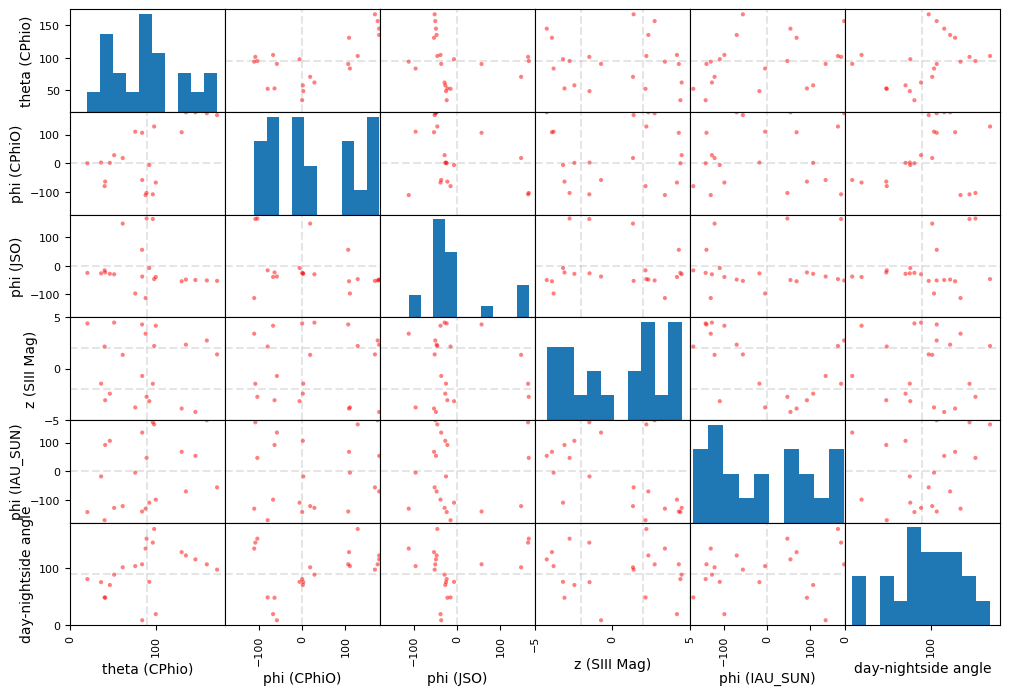

In [24]:
# sets limits for the graphs
theta_cphio_lims = [0, 180]
z_S3Mag_lims = [-5,5]
daynightside_lims = [0,180]
phi_lims = [-180, 180]
lims = [theta_cphio_lims, phi_lims, phi_lims, z_S3Mag_lims, phi_lims, daynightside_lims]

# plots and saves all graphs from 2 - 21 orbits to generate gif of coverage progression

all_graphs = -19
final_graph = 0

for k in range(final_graph, 1):
    if k == 0:
        important_data_i = important_data[1:,:]
    else:
        important_data_i = important_data[1:k,:]
    df = pd.DataFrame(important_data_i, columns=attributes)
    df = df.astype(float)
    axs = pd.plotting.scatter_matrix(df, figsize=(12, 8), color='r')
    
    # sets limits for graphs
    for i in range(6):
        for j in range(6):
            axs[i,j].set_xlim(lims[j])
            if i != j:
                axs[i,j].set_ylim(lims[i])
    
    # draws grouping lines on graphs
    for i in range(6):
        for j in range(6):
            if i != j:
                if i == 0: 
                    axs[i,j].plot(lims[j], [90, 90], color='gray', linestyle='dashed', alpha=0.2)
                elif i == 1:
                    axs[i,j].plot(lims[j], [0,0], color='gray', linestyle='dashed', alpha=0.2)
                elif i == 2:
                    axs[i,j].plot(lims[j], [0,0], color='gray', linestyle='dashed', alpha=0.2)
                elif i == 3:
                    axs[i,j].plot(lims[j], [-2,-2], color='gray', linestyle='dashed', alpha=0.2)
                    axs[i,j].plot(lims[j], [ 2, 2], color='gray', linestyle='dashed', alpha=0.2)
                elif i == 4:
                    axs[i,j].plot(lims[j], [0,0], color='gray', linestyle='dashed', alpha=0.2)
                elif i == 5:
                    axs[i,j].plot(lims[j], [90, 90], color='gray', linestyle='dashed', alpha=0.2)
                
                if j == 0:
                    axs[i,j].plot([90, 90], lims[i], color='gray', linestyle='dashed', alpha=0.2)
                elif j == 1:
                    axs[i,j].plot([0,0], lims[i], color='gray', linestyle='dashed', alpha=0.2)
                elif j == 2:
                    axs[i,j].plot([0,0], lims[i], color='gray', linestyle='dashed', alpha=0.2)
                elif j == 3:
                    axs[i,j].plot([-2,-2], lims[i], color='gray', linestyle='dashed', alpha=0.2)
                    axs[i,j].plot([ 2, 2], lims[i], color='gray', linestyle='dashed', alpha=0.2)
                elif j == 4:
                    axs[i,j].plot([0,0], lims[i], color='gray', linestyle='dashed', alpha=0.2)
                elif j == 5:
                    axs[i,j].plot([90, 90], lims[i], color='gray', linestyle='dashed', alpha=0.2)

               
    #plt.savefig('scatter_matrix_%s.png' % (21+k))
    plt.show()
